# TITANIC SURIVAL PREDICTION
## Data set:
In the early hours of April 15, 1912, the RMS Titanic, a luxurious ocean liner hailed as "unsinkable," met a tragic fate in the icy waters of the North Atlantic. On its maiden voyage from Southampton to New York City, the ship collided with an iceberg, tearing open its hull and sealing the fate of over 1,500 passengers and crew.

Despite being equipped with advanced safety features, including watertight compartments and wireless telegraphy, the Titanic's catastrophic sinking shocked the world and sparked sweeping reforms in maritime safety standards. This iconic disaster serves as a stark reminder of the frailty of human endeavors in the face of nature's unyielding force.

#### Data Set Source : https://www.kaggle.com/datasets/yasserh/titanic-dataset

## Study's goal : 
    Determine if a passenger survived the horrible disaster or not based on feature like: Age, Genre, Social status...

## Documentes structure:
1. Data collection
2. Data preprocessing/preparation
3. Modele construction and implemention 
4. Evaluation of the modele and optimisation
    
    

# 1. Data Collection
To handle the data set, we tend to use two famous libraries: 

    Pandas: A powerful Python library for data manipulation and analysis, offering data structures like DataFrame for easy handling of structured data.

    NumPy: The fundamental package for numerical computing in Python, providing support for large, multi+dimensional arrays and matrices, along with a wide range of mathematical functions.
    
    Matplotlib.pyplot: A module within the Matplotlib library that provides a MATLAB+like interface for creating static, interactive, and publication+quality visualizations in Python, facilitating the creation of plots, charts, histograms, and more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### showcase the version of the libraries imported


In [2]:
print('Pandas version: ',pd.__version__)
print('NumPy version: ',np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)

Pandas version:  2.0.3
NumPy version:  1.24.3
Seaborn version: 0.12.2
Matplotlib version:  3.7.2


### Different methods of importing data using pandas library:
    1. pandas.read_csv() ; to read .csv type files.
    2. pandas.read_json() ; to read Jason type files.
    3. pandas.read_excel() ; to read .xls/Excel speadcheet type of files.
    4. pandas.read_html() ; to read html type of documents and files

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
pd.set_option('display.max_rows', 100)  # The maximum number of rows/entries allowed to display for each function.
pd.set_option('display.max_columns', 100)  # The maximum number of features/columns to display for each function.

    The function pd.read_csv() makes it possible to import and convert type from .csv file into a instances of class <dataframe>
    
    Pandas DataFrame: In a Nutshell

        Core structure for data in Pandas.

        Think spreadsheet: rows & columns with labels.

        Holds various data types: numbers, text, etc.

        Efficient data manipulation & analysis.

        Foundation for data science workflows.  

# 2. Data preprocessing

## 2.1 Description of the data set and brief explanation of the features:
In this step, I'll try to explain the different dimensions and aspect of the dataset, including the different columns, number of entries, search for null values and much more.
    

### 2.1.1 Categorisation of dataset's variables:

The titanic dataset gives you information about multiple people like their ages, sexes, sibling counts, embarkment points and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking.
Generally, we can divide the data into two main categories:
 + Qualitative (Categorical): Describe qualities or categories with no inherent order (e.g., hair color, blood type).
    - Nominal: Distinct categories with no order (e.g., brand preference).
    - Ordinal: Ordered categories but with unequal differences (e.g., customer satisfaction rating).
 + Quantitative (Numerical): Represent numerical quantities with inherent meaning (e.g., height, weight).
    - Discrete: Countable values with intervals between them (e.g., number of siblings).
    - Continuous: A spectrum of possible values (e.g., temperature, income).

Knowing the variable type is crucial for choosing appropriate statistical methods and interpreting results accurately.

### 2.1.2 Dataset sample :

In [4]:
df.head() # df.head(n : int = nbr ) method allows us to get the first `nbr` rows of the dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail() # Contrary to the df.head() function, this function returns the last n rows of the dataframe.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2.1.3 Dataset Feature types and description: 

**Numerical (Discrete):**

* PassengerId: A unique identifier assigned to each passenger.
* Survived: Indicates whether the passenger survived (1) or not (0).
* Pclass: Passenger class (e.g., 1st, 2nd, 3rd), representing the ticket type purchased.
* SibSp: The number of siblings or spouses traveling with the passenger.
* Parch: The number of parents or children traveling with the passenger.

**Numerical (Continuous):**

* Age: The passenger's age in years at the time of travel.

**Categorical (Nominal):**

* Name: The passenger's full name.
* Sex: The passenger's gender.
* Ticket: The unique ticket number.
* Cabin: The cabin number or category assigned to the passenger.
* Embarked: The port where the passenger boarded the ship. 


## 2.2 - Data integrity and structure:

Before we continue we this study, we must make sure that we 'prepare' our data for visualisation and for testing.
One of these steps, is to verify the total number of rows and the existant of any null/non existing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we notice that the features `Age` contains only 714 entries, which means there're a lot of missing value. 

Same for the `Cabin` and `Embarked` features.

To count how many values are missing, we use the following method:


In [7]:
print(df['Age'].isnull().sum(), 'missing values')

177 missing values


In [8]:
print(df['Cabin'].isnull().sum(), 'missing values')

687 missing values


In [9]:
print(df['Embarked'].isnull().sum(), 'missing values')

2 missing values


Or we can simply write the following line of code:

In [10]:
print('Feature \t Missing')
print('+------------+-----------+')
df.isnull().sum()

Feature 	 Missing
+------------+-----------+


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print('The number of duplicated values is : ', df.duplicated().sum() )

The number of duplicated values is :  0


Which mean that there for each Feature in our dataset, there are not duplicated values.

It may come in handy to calculate some statistics about our dataframe, which is possible and frankly quite easy to do in Pandas

In [12]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2.3 Data visualisation:

### 2.3.1 Passenger distribution based on the Gender:

In [13]:
sex_dist = df["Sex"].value_counts()
print(sex_dist)

Sex
male      577
female    314
Name: count, dtype: int64


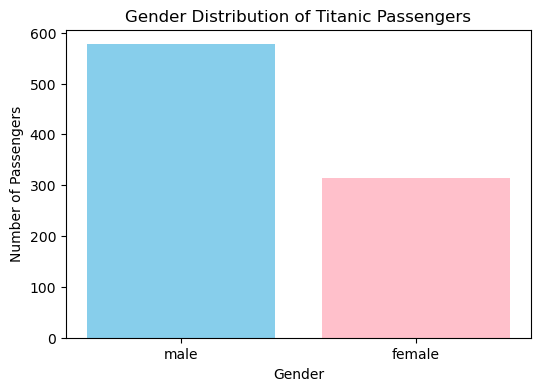

In [14]:
plt.figure(figsize=(6, 4)) # Setting the figure size
plt.bar(x=sex_dist.index, height=sex_dist, color=('skyblue', 'pink')) # Create bar chart
# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Gender Distribution of Titanic Passengers')
# Show plot
plt.show()

### 2.3.2 Passenger based on parents or children aboard 

In [15]:
parch_count = df['Parch'].value_counts().sort_index()
print(parch_count)

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


We notice that the majority of the passenger on the voyage boarded the ship with no parent or childrens, while only 1 passenger boarded with 6 relatives(perhaps 4 childrens and 2 parent ).


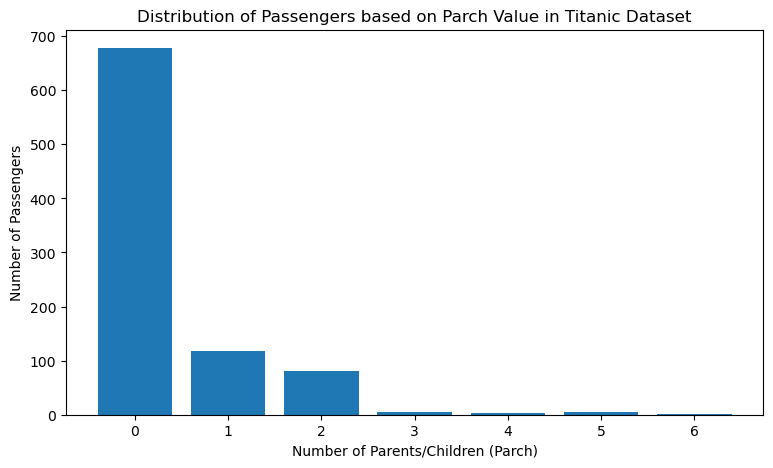

In [16]:
plt.figure(figsize=(9, 5))

# Create bar chart
plt.bar(x=parch_count.index, height=parch_count)

# Add labels and title
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers based on Parch Value in Titanic Dataset')

plt.show()

### 2.3.3 Age distribution

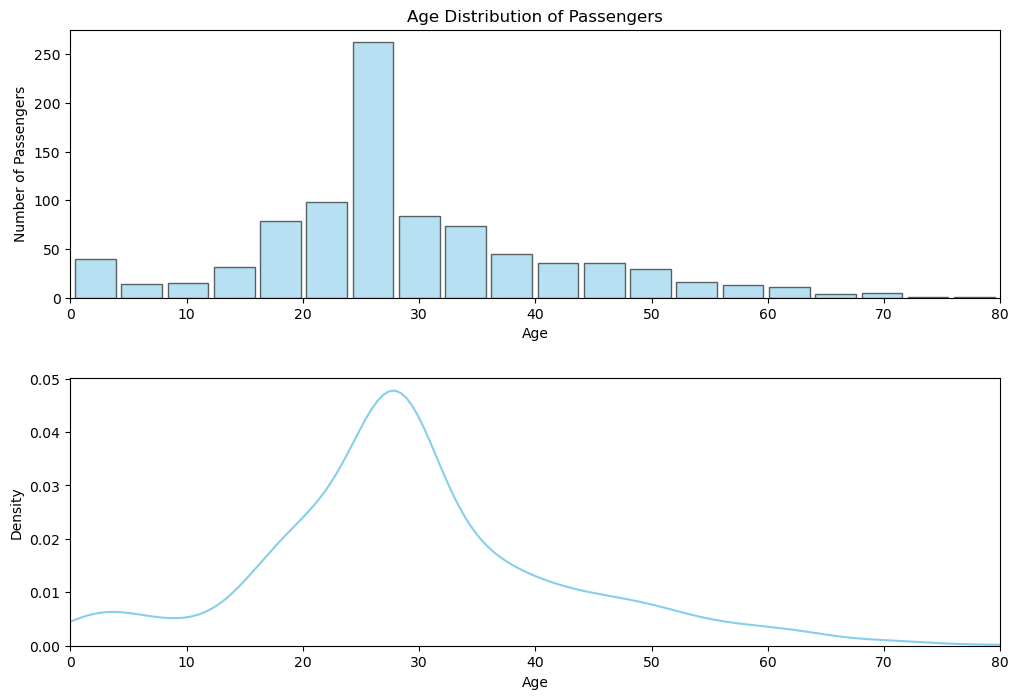

In [48]:
plt.figure(figsize=(12, 8))  

plt.subplots_adjust(hspace=0.3)  # Adjust the value of hspace to control the vertical spacing

# Create subplot 1 for the histogram
plt.subplot(211)

# Create a histogram of the age distribution
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.6, width=3.5, histtype='barstacked')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers')

# Set the x-axis limits for the histogram
plt.xlim(0, 80)

# Create subplot 2 for the density plot
plt.subplot(212)

# Create a density distribution based on KDE
sns.kdeplot(df.fillna({'Age': df['Age'].mean()}, inplace=False)['Age'], color='skyblue')

# Set the x-axis limits for the density plot
plt.xlim(0, 80)

plt.show()


### 2.3.4 Pclass distrbitution

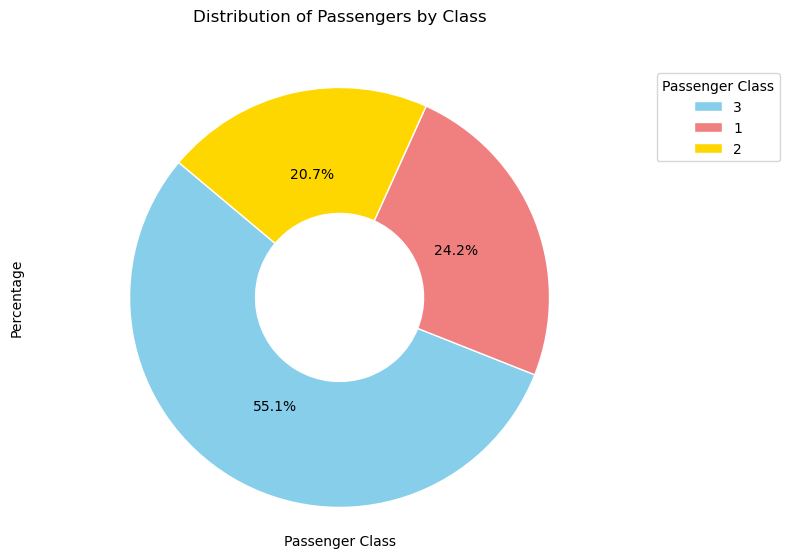

In [18]:
pclass_counts = df['Pclass'].value_counts()

colors = ['skyblue', 'lightcoral', 'gold']  

plt.figure(figsize=(8, 6))  

pclass_counts.plot(kind='pie', autopct="%.1f%%",  startangle=140, labels=None,  colors=colors,  wedgeprops=dict(width=0.6, edgecolor='w'))
# autopct : Display percentage labels with one decimal place
# startangle : Rotate starting angle for better readability
# labels : Temporarily disable labels (add them later)
# colors : Use the defined colors (optional)
# wedgeprops : Set slice width and white edge color

# Add legend and labels outside the pie chart for clarity
plt.legend(pclass_counts.index, loc='upper left', title='Passenger Class', bbox_to_anchor=(1, 1))
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')

# Set title with centered alignment
plt.title('Distribution of Passengers by Class', y=1.08)  # Adjust title position

plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

plt.show()


### 2.3.5 Survival Devided by Age:

### Dealing with missing values :
One of the most common way to combat this issue is to fill in the missing value using some calucalated values from the dataset that will fit nicely into the dataframe, like the mean, median or even the mode of the feature

In [19]:
df_mean = df['Age'].mean().round(3) ; print('The mean of "Age" feature is : ', df_mean)
df_median = df['Age'].median() ; print('The median of "Age" feature is : ', df_median)
df_mode = df['Age'].mode() ; print('The mode of "Age" feature is : ', df_mode)

The mean of "Age" feature is :  29.699
The median of "Age" feature is :  28.0
The mode of "Age" feature is :  0    24.0
Name: Age, dtype: float64


In [20]:
df.fillna({'Age': df_median}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now we notice that the columns that represent the feature 'Age' contains non missing value. 